In [1]:
# 6.1.4 (Create Latitude and Longitude Combinations) Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.02541009633524 88.66079677387688
61.29473012273394 -128.7845802585871
37.656843644143834 -144.87264386996458
-86.54723296699295 -70.77781832427075
-42.26814241661862 120.85898353276599
-80.3032060351365 -64.93928127846198
-21.20321716525686 23.062602237231687
-51.797762927740486 -93.43908488924143
68.62179613240224 102.72323852430225
-42.356988658236325 68.62679755781059
70.67042923985778 168.7469665005899
-40.37229870614106 -36.87108997421359
72.56938845512181 36.66985283982507
10.37980780351397 95.14116663086276
0.8826475814129395 127.28220197058812
-15.407862517497222 -37.88528635910515
-1.3258413566087057 -176.49007106382345
61.26882534720781 -172.16147205703132
-0.9172126927158928 89.39014518363007
-68.12497845647106 139.1530160781818
34.06476456647161 91.64298601864738
-46.11159024175308 -67.78631224794206
-60.980200631566134 4.8486185363619825
33.250248323428636 -33.03273841517401
81.5107351578207 26.816244519378017
-78.51372415403716 -54.061329182154225
81.45080450093684 -1

In [5]:
# 6.1.5 Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [9]:
# 6.2.6 Get the City Weather Data. Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
cities

['busselton',
 'norman wells',
 'kahului',
 'ushuaia',
 'albany',
 'sehithwa',
 'castro',
 'khatanga',
 'souillac',
 'pevek',
 'cidreira',
 'tumannyy',
 'port blair',
 'ternate',
 'canavieiras',
 'vaitupu',
 'provideniya',
 'meulaboh',
 'hobart',
 'lasa',
 'comodoro rivadavia',
 'hermanus',
 'ribeira grande',
 'mehamn',
 'tuktoyaktuk',
 'kampene',
 'thompson',
 'kapaa',
 'kavaratti',
 'rikitea',
 'jamestown',
 'touros',
 'san felipe',
 'lolua',
 'port alfred',
 'nanortalik',
 'evensk',
 'vestmannaeyjar',
 'maxixe',
 'cape town',
 'tsihombe',
 'puerto ayora',
 'mataura',
 'isangel',
 'butaritari',
 'guiren',
 'muscat',
 'east london',
 'attawapiskat',
 'iqaluit',
 'amderma',
 'rodeo',
 'bredasdorp',
 'ascoli piceno',
 'dikson',
 'mantua',
 'naze',
 'barrow',
 'san jose de guanipa',
 'vardo',
 'arraial do cabo',
 'atuona',
 'mocambique',
 'klaksvik',
 'cabo san lucas',
 'jalu',
 'bolungarvik',
 'mudyuga',
 'husavik',
 'illoqqortoormiut',
 'yellowknife',
 'upernavik',
 'trairi',
 'sataua'

In [11]:
# Cell 10 . Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | sehithwa
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | ternate
Processing Record 15 of Set 1 | canavieiras
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | comodoro rivadavia
Processing Record 22 of Se

Processing Record 37 of Set 4 | coquimbo
Processing Record 38 of Set 4 | muros
Processing Record 39 of Set 4 | bowen
Processing Record 40 of Set 4 | kefamenanu
Processing Record 41 of Set 4 | half moon bay
Processing Record 42 of Set 4 | samusu
City not found. Skipping...
Processing Record 43 of Set 4 | jamame
Processing Record 44 of Set 4 | fukue
Processing Record 45 of Set 4 | severodvinsk
Processing Record 46 of Set 4 | kattivakkam
Processing Record 47 of Set 4 | gazanjyk
Processing Record 48 of Set 4 | keetmanshoop
Processing Record 49 of Set 4 | atikokan
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | kambove
Processing Record 2 of Set 5 | phan thiet
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | tucurui
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of Set 5 | martapura
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 5 |

City not found. Skipping...
Processing Record 28 of Set 8 | peterhead
Processing Record 29 of Set 8 | pitimbu
Processing Record 30 of Set 8 | weligama
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 8 | kochubey
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | vyartsilya
Processing Record 36 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 37 of Set 8 | westpunt
City not found. Skipping...
Processing Record 38 of Set 8 | boende
Processing Record 39 of Set 8 | satitoa
City not found. Skipping...
Processing Record 40 of Set 8 | dwarka
Processing Record 41 of Set 8 | wanaka
Processing Record 42 of Set 8 | maltahohe
Processing Record 43 of Set 8 | sistranda
Processing Record 44 of Set 8 | bairiki
Processing Record 45 of Set 8 | gillette
Processing Record 46 of Set 8 | sinnamary
Processing Record 47 of Set 8 | aksarka
Processing Record 48 of Set 8 | san

Processing Record 12 of Set 12 | santa teresa
Processing Record 13 of Set 12 | paracuru
Processing Record 14 of Set 12 | kysyl-syr
Processing Record 15 of Set 12 | gore
Processing Record 16 of Set 12 | oppdal
Processing Record 17 of Set 12 | ajra
Processing Record 18 of Set 12 | wolmaranstad
City not found. Skipping...
Processing Record 19 of Set 12 | nyrob
Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | safaga
Processing Record 22 of Set 12 | xuanhua
Processing Record 23 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | san policarpo
Processing Record 26 of Set 12 | sherbakul
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | nome
Processing Record 29 of Set 12 | the valley
Processing Record 30 of Set 12 | tunduma
Processing Record 31 of Set 12 | kiunga
Processing Record 32 of Set 12 | lar gerd
City not found. Skipping...
Proces

In [12]:
city_data

[{'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 50.86,
  'Humidity': 84,
  'Cloudiness': 4,
  'Wind Speed': 1.5,
  'Country': 'AU',
  'Date': '2022-10-25 17:30:28'},
 {'City': 'Norman Wells',
  'Lat': 65.282,
  'Lng': -126.8329,
  'Max Temp': 19.44,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 4.61,
  'Country': 'CA',
  'Date': '2022-10-25 17:30:29'},
 {'City': 'Kahului',
  'Lat': 20.8947,
  'Lng': -156.47,
  'Max Temp': 79.84,
  'Humidity': 73,
  'Cloudiness': 20,
  'Wind Speed': 14.97,
  'Country': 'US',
  'Date': '2022-10-25 17:30:30'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 47.82,
  'Humidity': 57,
  'Cloudiness': 0,
  'Wind Speed': 6.91,
  'Country': 'AR',
  'Date': '2022-10-25 17:30:30'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 67.78,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 1.99,
  'Country': 'US',
  'Date': '2022-10-25 17:30:03'},
 {'City': 'Sehithwa',
  'Lat': -20.4667,
 

In [13]:
    # Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,50.86,84,4,1.50,AU,2022-10-25 17:30:28
1,Norman Wells,65.2820,-126.8329,19.44,93,75,4.61,CA,2022-10-25 17:30:29
2,Kahului,20.8947,-156.4700,79.84,73,20,14.97,US,2022-10-25 17:30:30
3,Ushuaia,-54.8000,-68.3000,47.82,57,0,6.91,AR,2022-10-25 17:30:30
4,Albany,42.6001,-73.9662,67.78,94,100,1.99,US,2022-10-25 17:30:03


## blah

In [14]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-10-25 17:30:28,-33.6500,115.3333,50.86,84,4,1.50
1,Norman Wells,CA,2022-10-25 17:30:29,65.2820,-126.8329,19.44,93,75,4.61
2,Kahului,US,2022-10-25 17:30:30,20.8947,-156.4700,79.84,73,20,14.97
3,Ushuaia,AR,2022-10-25 17:30:30,-54.8000,-68.3000,47.82,57,0,6.91
4,Albany,US,2022-10-25 17:30:03,42.6001,-73.9662,67.78,94,100,1.99


In [16]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

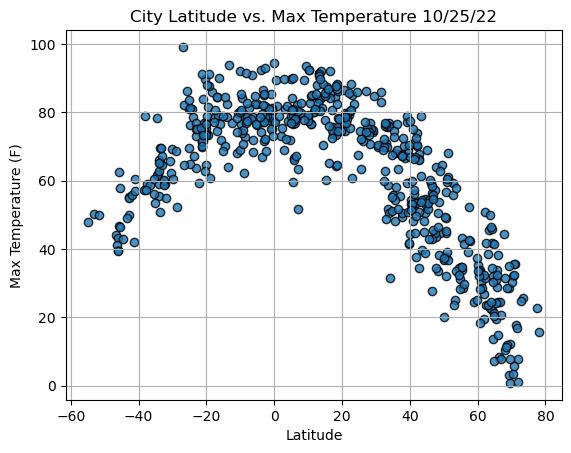

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

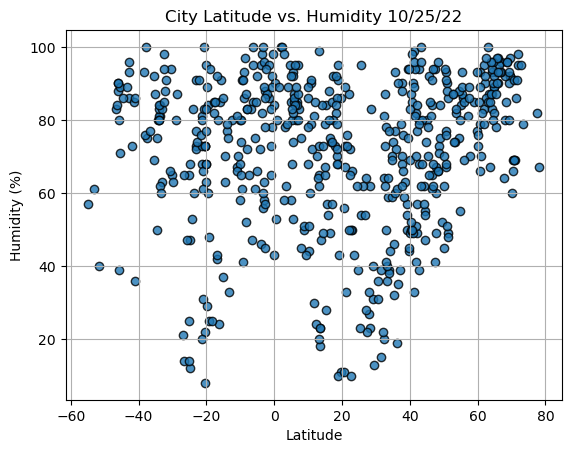

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

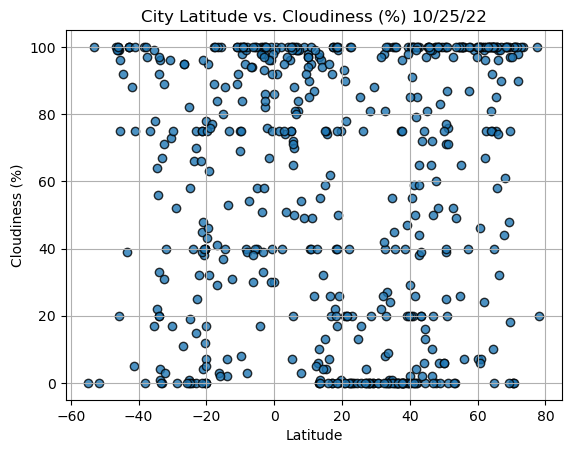

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

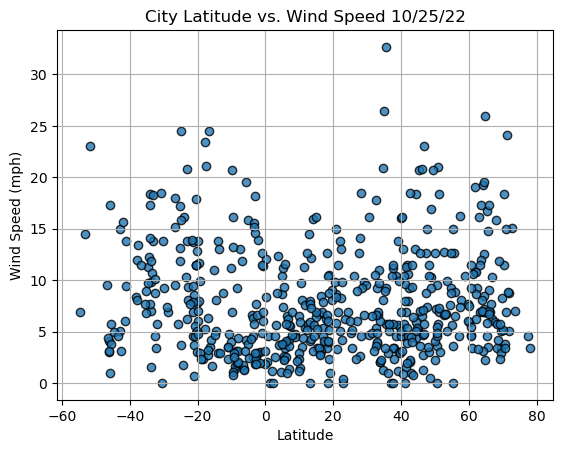

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()